In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette('deep')


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette('deep')

print("✅ Imports OK")


✅ Imports OK


In [217]:
import os
os.getcwd()


'c:\\Users\\palar\\Documents\\churn-betabank-paola — Visual Studio Code\\notebooks'

In [218]:
import pandas as pd

# Cargar el archivo correctamente
df = pd.read_csv('../data/churn.csv')

# Ver las primeras filas
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [219]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [220]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


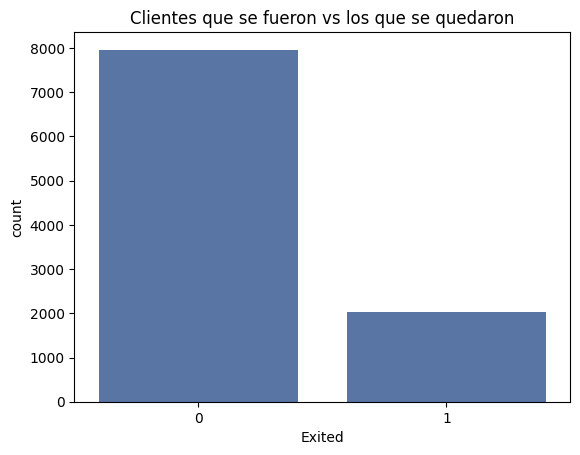

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Exited', data=df)
plt.title('Clientes que se fueron vs los que se quedaron')
plt.show()


In [222]:
import pandas as pd

# Copiamos el dataframe original
df_model = df.copy()

# Convertir variables categóricas en números (One-Hot Encoding)
df_model = pd.get_dummies(df_model, drop_first=True)

# Separar X (features) y y (target)
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción
preds = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, preds))


✅ Accuracy: 0.8665


In [224]:
# Ver estructura general de los datos
df.info()

# Ver estadísticas básicas de las variables numéricas
df.describe()

# Revisar si hay valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

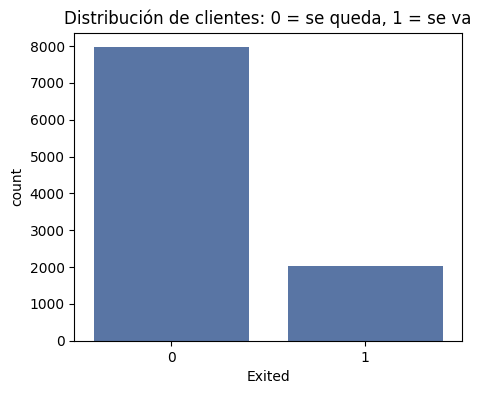

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(x=df['Exited'])
plt.title('Distribución de clientes: 0 = se queda, 1 = se va')
plt.show()

df['Exited'].value_counts(normalize=True) * 100


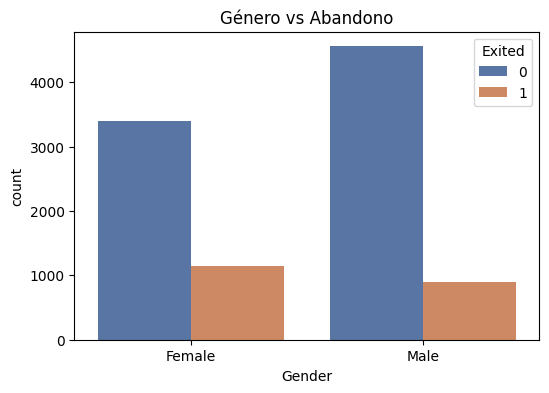

In [226]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Género vs Abandono')
plt.show()


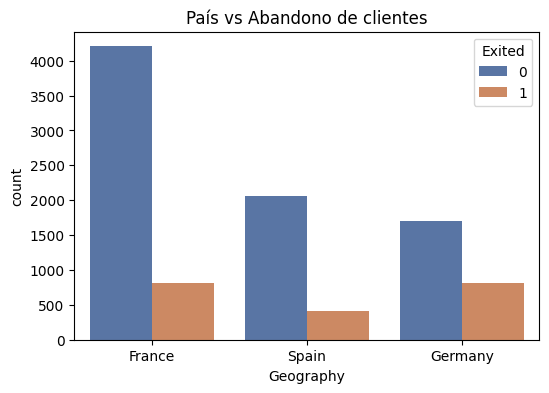

In [227]:
plt.figure(figsize=(6,4))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('País vs Abandono de clientes')
plt.show()


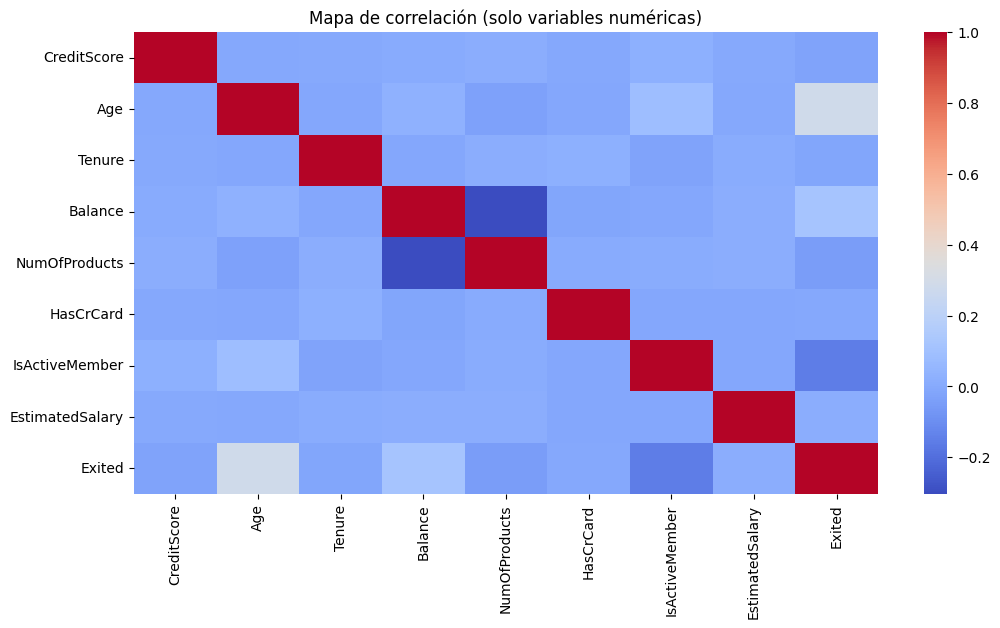

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Hacer una copia del DataFrame solo con columnas numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# 2. Calcular la matriz de correlación
corr = df_num.corr()

# 3. Graficar
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Mapa de correlación (solo variables numéricas)')
plt.show()



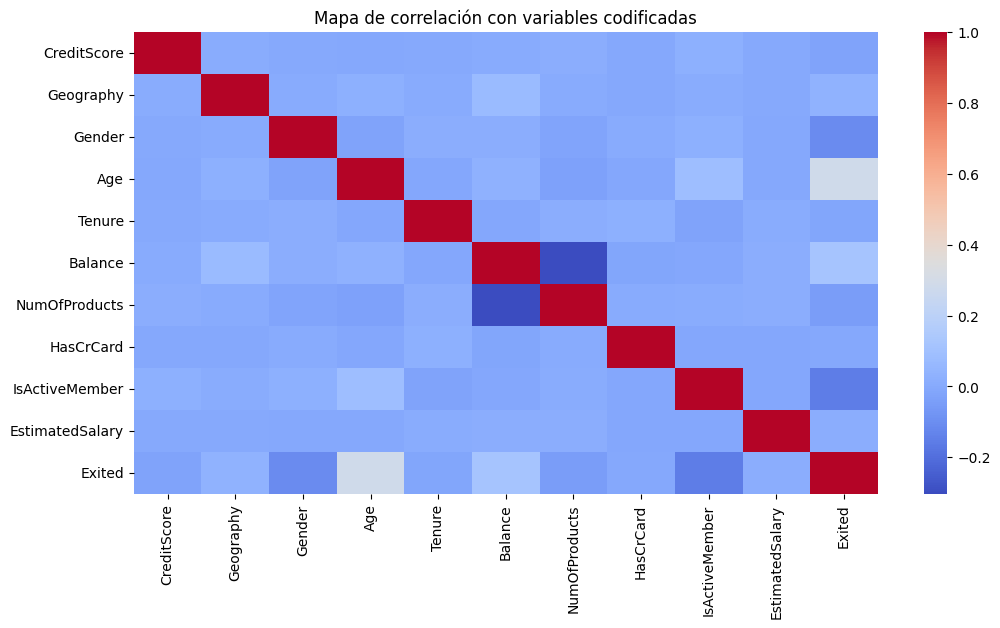

In [229]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoder = LabelEncoder()

for col in ['Geography', 'Gender']:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

corr = df_encoded.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Mapa de correlación con variables codificadas')
plt.show()


In [230]:
# Paso 9: Codificación y escalado

from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1️⃣ Copiamos el DataFrame para no modificar el original
df_processed = df.copy()

# 2️⃣ Codificamos variables categóricas (convertimos texto a números)
label_encoder = LabelEncoder()

for col in ['Geography', 'Gender']:   # Puedes agregar más columnas si quieres
    df_processed[col] = label_encoder.fit_transform(df_processed[col])

# 3️⃣ Separamos variables predictoras (X) y variable objetivo (y)
X = df_processed.drop('Exited', axis=1)
y = df_processed['Exited']

# 4️⃣ Escalamos todas las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Paso 9 completado: datos codificados y escalados correctamente.")


✅ Paso 9 completado: datos codificados y escalados correctamente.


✅ 📌 Paso 10 — Balancear la variable objetivo (Exited)

Nuestro dataset está desequilibrado (hay más clientes que se quedan que los que se van).
Esto puede hacer que el modelo aprenda a “decir siempre que no se va” y aún así tenga buena precisión.

Para evitarlo, aplicaremos SMOTE (Synthetic Minority Oversampling Technique).
Este método crea ejemplos sintéticos de la clase minoritaria.

In [231]:
# Paso 10: Balanceo de clases con SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1️⃣ Dividimos los datos antes de aplicar SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 2️⃣ Aplicamos SMOTE SOLO en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("✅ SMOTE aplicado correctamente")
print("📌 Clases antes de SMOTE:", y_train.value_counts().to_dict())
print("📌 Clases después de SMOTE:", y_train_bal.value_counts().to_dict())


✅ SMOTE aplicado correctamente
📌 Clases antes de SMOTE: {0: 6370, 1: 1630}
📌 Clases después de SMOTE: {1: 6370, 0: 6370}


In [232]:
# Paso 11: Entrenar y evaluar un modelo (Random Forest)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1️⃣ Entrenamos con los datos balanceados
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# 2️⃣ Hacemos predicciones en el conjunto de prueba (test)
y_pred = model.predict(X_test)

# 3️⃣ Evaluamos el rendimiento
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\n📌 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.842

📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.62      0.58      0.60       407

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000


📌 Matriz de confusión:
[[1448  145]
 [ 171  236]]


In [233]:
# ✅ Paso 11 - Modelo rápido: Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predicciones rápidas
y_pred = model.predict(X_test)

# Resultados inmediatos
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\n📌 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.842

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.62      0.58      0.60       407

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000


📌 Matriz de Confusión:
[[1448  145]
 [ 171  236]]
